In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from statsmodels.formula.api import ols      # For n-way ANOVA
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [2]:
#Read the data
df = pd.read_csv("SalaryData.csv")

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [5]:
df.shape

(40, 3)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,40.0,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


In [7]:
n=df.shape[0]*df.shape[1] 
k=df.shape[1] 
print("The total number of observations is",n )
print("The number of groups is",k)

The total number of observations is 120
The number of groups is 3


In [8]:
#Degree of freedom between groups
dfb=k-1
print('Degree of Freedom between groups',dfb)
#Degree of freedom within groups
dfw=n-k
print('Degree of Freedom within groups',dfw)

Degree of Freedom between groups 2
Degree of Freedom within groups 117


In [9]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [10]:
df_e= df.drop(['Occupation'], axis=1) # creating a new dataframe without the Occupation column

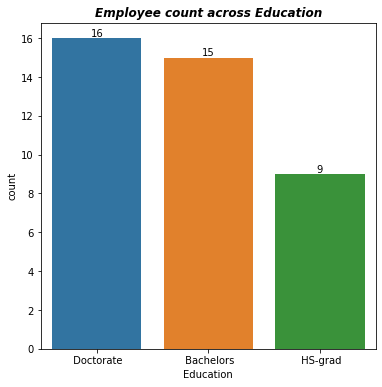

In [11]:
plt.figure(figsize =(6,6))
ax = sns.countplot(x = 'Education',  data = df)
ax.set_title("Employee count across Education", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');

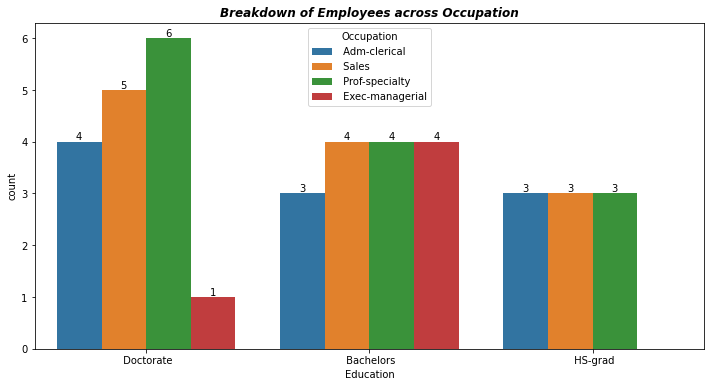

In [12]:
plt.figure(figsize =(12,6))
ax = sns.countplot(x = 'Education', hue='Occupation', data = df)
ax.set_title("Breakdown of Employees across Occupation", fontsize=12, weight='bold', style='italic')
ax.bar_label(ax.containers[0], label_type='edge');
ax.bar_label(ax.containers[1], label_type='edge');
ax.bar_label(ax.containers[2], label_type='edge');
ax.bar_label(ax.containers[3], label_type='edge');

## Filtering the stacked data

In [13]:
a = df_e[df_e['Education'] == ' Doctorate']
b = df_e[df_e['Education'] == ' Bachelors']
c = df_e[df_e['Education'] == ' HS-grad']

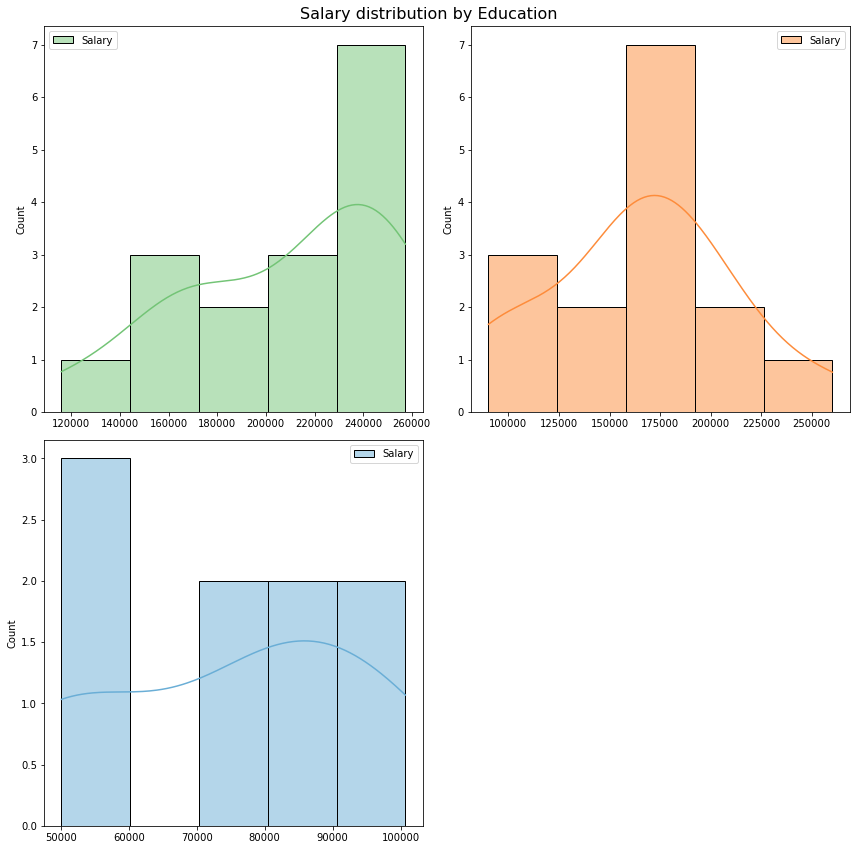

In [14]:
plt.figure(figsize =(12,12))
plt.subplot(2,2,1) ## Row - Column - Order
sns.histplot(a, kde =True, palette= 'Greens') 
plt.subplot(2,2,2) 
sns.histplot(b, kde =True, palette ='Oranges')
plt.subplot(2,2,3)
sns.histplot(c, kde =True, palette='Blues')

plt.suptitle("Salary distribution by Education", fontsize =16)
plt.tight_layout();

## Test for Normality -  Shapiro- Wilk Test

### these tests are done for practice/reference only

### Null Hypothesis : The given observation is normally distributed
### Alternative Hypothesis : The given observation is not normally distributed

In [15]:
## Post filtering we apply the shapiro- Wilk Test
#The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.
#alpha = 0.05
t1,p1 = stats.shapiro(a['Salary'])
t2,p2 = stats.shapiro(b['Salary'])
t3,p3 = stats.shapiro(c['Salary'])
print(p1,p2,p3)

0.0675690770149231 0.7050924301147461 0.1783432960510254


### p-value is higher than alpha =0.05, that means,  we go ahead with null hypothesis as the observations are normally distributed

## Levene's Test
#### Computes homogeneity of variance across groups.

### The Levene test tests the null hypothesis that all input samples are from populations with equal variances.
### alpha = 0.05

### Null Hypothesis: Ho -The variances in the given dataset is the same
### Alternative Hypothesis: Ha - The variances in the given dataset is different 

In [16]:
LT = stats.levene(a['Salary'], b['Salary'], c['Salary'])
print(LT)

LeveneResult(statistic=1.8800921605836554, pvalue=0.16686425699301183)


#### Since p-value is greater than 0.05, we shall proceed with null hypothesis that the variances are the same

# Formulate the Null and Alternate Hypothesis

𝐻0 : The mean Salary of an individual is same across all levels of Education 

𝐻1 : The mean Salary of an individual is different for atleast one level of Education

# One Way Anova
**Now, let us go ahead and perform one way ANOVA for 'Education' with respect to 'Salary'.**

In [17]:
formula = 'Salary ~ C(Education)' ## y = f(X)
model = ols(formula, df_e).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


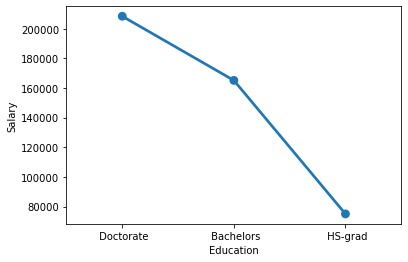

In [18]:
sns.pointplot(x ='Education', y='Salary', data =df_e, ci=None);

In [19]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [20]:
df_o= df.drop(['Education'], axis=1) # creating a new dataframe without the Education column

## Filtering the stacked data

In [21]:
d = df_o[df_o['Occupation'] == ' Adm-clerical']
e = df_o[df_o['Occupation'] == ' Sales']
f = df_o[df_o['Occupation'] == ' Prof-specialty']
g = df_o[df_o['Occupation'] == ' Exec-managerial']

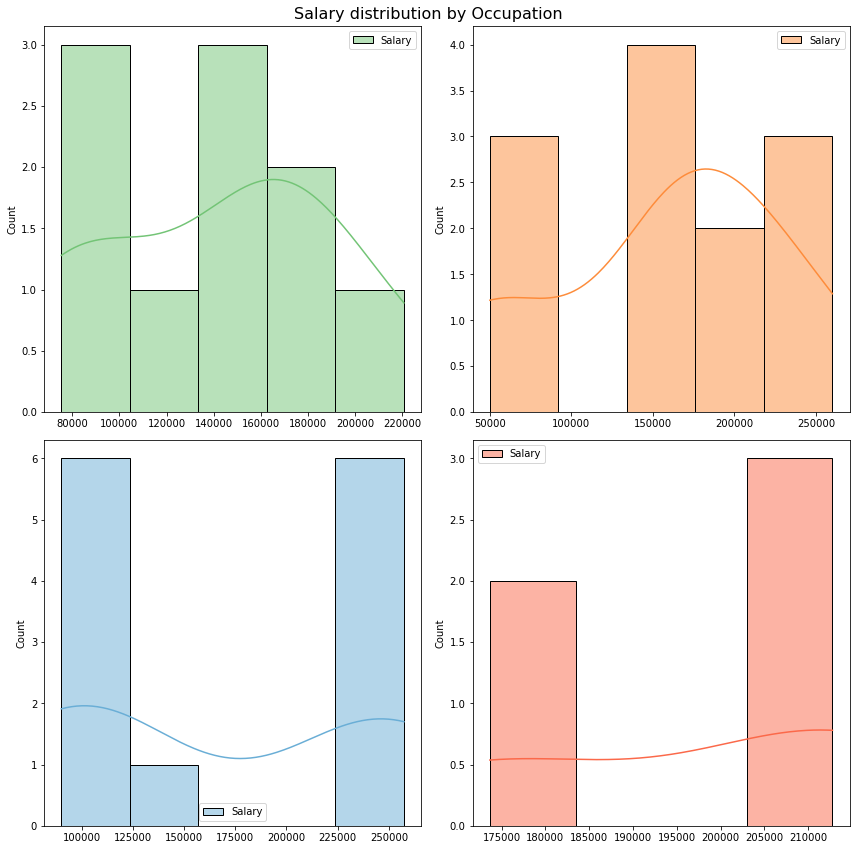

In [22]:
plt.figure(figsize =(12,12))
plt.subplot(2,2,1) ## Row - Column - Order
sns.histplot(d, kde =True, palette= 'Greens') 
plt.subplot(2,2,2) 
sns.histplot(e, kde =True, palette ='Oranges')
plt.subplot(2,2,3)
sns.histplot(f, kde =True, palette='Blues')
plt.subplot(2,2,4)
sns.histplot(g, kde =True, palette='Reds')


plt.suptitle("Salary distribution by Occupation", fontsize =16)
plt.tight_layout();

# Formulate the Null and Alternate Hypothesis

𝐻0 : The mean Salary of an individual is the same across all levels of Occupation 

𝐻1 : The mean Salary of an individual is different for atleast one level of Occupation

# One Way Anova
**Now, let us go ahead and perform one way ANOVA with 'Occupation' with respect to 'Salary'.**

In [23]:
formula = 'Salary ~ C(Occupation)' ## y = f(X)
model = ols(formula, df_o).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


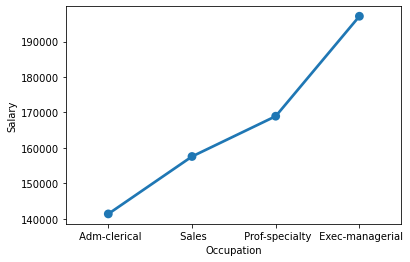

In [24]:
sns.pointplot(x ='Occupation', y='Salary', data =df_o, ci=None);

# Two Way Anova
**Let us now perform the Two Way ANOVA. We will now analyse the effect of both Education and Occupation on the 'Salary' variable.**

In [25]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


**Let us check whether there is any interaction effect between the treatments.**

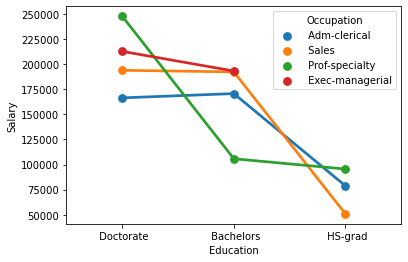

In [26]:
sns.pointplot(x='Education', y='Salary', hue='Occupation', data=df, ci=None); 

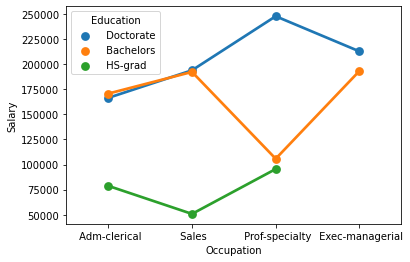

In [27]:
sns.pointplot(x='Occupation', y='Salary', hue='Education', data=df, ci=None); 

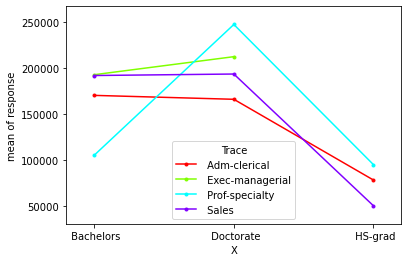

In [28]:
#Method 2 of drawing an interaction plot

from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df['Education']),np.array(df['Occupation']),np.array(df['Salary']));

Still, we can see that there is some sort of interaction between the two treatments. So, we will introduce a new term while performing the Two Way ANOVA.

In [29]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN
